In [ ]:
####tbacking version####

In [1]:
stockname = str(input())

LG화학


In [2]:
import pandas_datareader as pdr
import pandas as pd
# 회사명으로 주식 종목 코드를 획득할 수 있도록 하는 함수
def get_code(df, name):
    code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
# 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
    code = code.strip()
    return code
# excel 파일을 다운로드하는거와 동시에 pandas에 load하기
# 흔히 사용하는 df라는 변수는 data frame을 의미합니다.
code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
# data frame정리
code_df = code_df[['회사명', '종목코드']]
# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})
# 종목코드는 6자리로 구분되기때문에 0을 채워 6자리로 변경
code_df.code = code_df.code.map('{:06d}'.format)
# ex) 삼성전자의의 코드를 구해보겠습니다.
code = get_code(code_df, stockname)
# yahoo의 주식 데이터 종목은 코스피는 .KS, 코스닥은 .KQ가 붙습니다.
# 삼성전자의 경우 코스피에 상장되어있기때문에 '종목코드.KS'로 처리하도록 한다.
code = code + '.KS'
# get_data_yahoo API를 통해서 yahho finance의 주식 종목 데이터를 가져온다.
df_yahoo = pdr.get_data_yahoo(code)

df_yahoo = df_yahoo[['Open', 'High', 'Low', 'Close', 'Volume']].iloc[:,:4]
df_yahoo

,Open,High,Low,Close
Date,,,,
2015-11-16,294000.0,298000.0,293000.0,294000.0
2015-11-17,301000.0,316500.0,298500.0,313500.0
2015-11-18,313500.0,319000.0,310000.0,313000.0
2015-11-19,317500.0,327500.0,317000.0,326000.0
2015-11-20,327500.0,332500.0,321500.0,322500.0
...,...,...,...,...
2020-11-09,739000.0,750000.0,722000.0,734000.0
2020-11-10,722000.0,733000.0,701000.0,702000.0
2020-11-11,708000.0,717000.0,685000.0,692000.0


[[296500.]
 [298000.]
 [299500.]
 ...
 [677000.]
 [720000.]
 [734000.]]
1097 122
Epoch 1/100
1095/1095 - 2s - loss: 0.0071
Epoch 2/100
1095/1095 - 3s - loss: 0.0013
Epoch 3/100
1095/1095 - 3s - loss: 2.0770e-04
Epoch 4/100
1095/1095 - 2s - loss: 1.9085e-04
Epoch 5/100
1095/1095 - 3s - loss: 1.9589e-04
Epoch 6/100
1095/1095 - 3s - loss: 1.9101e-04
Epoch 7/100
1095/1095 - 3s - loss: 1.9575e-04
Epoch 8/100
1095/1095 - 3s - loss: 1.9236e-04
Epoch 9/100
1095/1095 - 2s - loss: 1.9403e-04
Epoch 10/100
1095/1095 - 2s - loss: 1.9406e-04
Epoch 11/100
1095/1095 - 2s - loss: 1.8964e-04
Epoch 12/100
1095/1095 - 2s - loss: 1.9104e-04
Epoch 13/100
1095/1095 - 3s - loss: 1.9102e-04
Epoch 14/100
1095/1095 - 3s - loss: 1.9864e-04
Epoch 15/100
1095/1095 - 2s - loss: 1.8863e-04
Epoch 16/100
1095/1095 - 2s - loss: 1.9023e-04
Epoch 17/100
1095/1095 - 3s - loss: 1.8964e-04
Epoch 18/100
1095/1095 - 2s - loss: 1.8692e-04
Epoch 19/100
1095/1095 - 2s - loss: 1.8425e-04
Epoch 20/100
1095/1095 - 2s - loss: 1.9036e

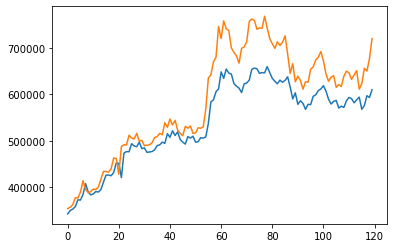

In [3]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
 
look_back = 1
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)
 
# file loader
fullpath = 'C:\\Users\\ahn01\\StockMarketPred\\051910.csv'
pandf = pd.read_csv(fullpath, index_col="Date")
 
# convert nparray
nparr = pandf['Close'].values[::1]
nparr.astype('float32')
nparr = nparr.reshape(-1,1)
print(nparr)
 
# normalization
scaler = MinMaxScaler(feature_range=(0, 1))
nptf = scaler.fit_transform(nparr)
 
# split train, test
train_size = int(len(nptf) * 0.9)
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))
 
# create dataset for learning
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
 
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
 
# simple lstm network learning
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
 
# make prediction
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Train Score: %.2f RMSE' % testScore)
 
# predict last value (or tomorrow?)
lastX = nptf[-1]
lastX = np.reshape(lastX, (1, 1, 1))
lastY = model.predict(lastX)
lastY = scaler.inverse_transform(lastY)
print('Predict the Close value of final day: %d' % lastY)  # 데이터 입력 마지막 다음날 종가 예측
 
# plot
plt.plot(testPredict)
plt.plot(testY)
plt.show()